In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

# 1 item

In [2]:
data = pd.read_csv(r'C:\Users\preductor\Documents\MachineLearning\6_course\Time series analysis\yellow_tripdata_2016-05.csv')

In [3]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


# 2 item

In [4]:
filt = data[data.passenger_count!=0][data.trip_distance!=0]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [5]:
filt = filt[filt.pickup_latitude>40.49612][40.91553>filt.pickup_latitude]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [6]:
filt = filt[filt.pickup_longitude>-74.25559][-73.70001>filt.pickup_longitude]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [7]:
filt['tpep_dropoff_datetime'] = pd.to_datetime(filt['tpep_dropoff_datetime'])
filt['tpep_pickup_datetime'] = pd.to_datetime(filt['tpep_pickup_datetime'])
filt = filt[filt['tpep_dropoff_datetime'] != filt['tpep_pickup_datetime']]

In [92]:
filt.shape

(11626521, 21)

# 3 item

In [9]:
regions = pd.read_csv(r'C:\Users\preductor\Documents\MachineLearning\6_course\Time series analysis\regions.csv',
                      sep=';')
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


### Таблица с количеством заказов на каждом участке за весь месяц

In [79]:
binx = sorted(regions.south.unique())
biny = sorted(regions.west.unique())
binx.append(regions.north.max())
biny.append(regions.east.max())

In [113]:
y = filt.pickup_latitude
x = filt.pickup_longitude

In [115]:
ret = stats.binned_statistic_2d(x, y, None, 'count', bins=[biny, binx], expand_binnumbers=True)

In [118]:
filt['region'] = (ret.binnumber[0]-1)*50 + ret.binnumber[1]

In [120]:
data_regions = regions.iloc[filt['region'] - 1]
check = filt['pickup_longitude'].values >= data_regions['west'].values
check = check & (filt['pickup_longitude'].values <= data_regions['east'].values)
check = check & (filt['pickup_latitude'].values >= data_regions['south'].values)
check = check & (filt['pickup_latitude'].values <= data_regions['north'].values)
check.all()

True

### Таблица с номерами участков

In [15]:
regions_numbers = amount_of_trips.copy()

In [16]:
for i in regions.index:
    regions_numbers.loc[regions.loc[i,'south'], regions.loc[i,'west']] = regions.loc[i,'region']

### Почасовые данные о кол-ве заказов на разных участках за май 2016

In [34]:
filt['hours'] = filt.tpep_pickup_datetime.dt.hour
filt['day'] = filt.tpep_pickup_datetime.dt.day

In [121]:
filt_indexed = filt.set_index(['day','hours'])

In [127]:
agg_data = pd.DataFrame(index=filt_indexed.index.unique(), columns=range(1,2501))

In [132]:
agg_data.fillna(0, inplace=True)

In [123]:
# %%time
# for hour in agg_data.index:
#     x = filt_indexed.loc[hour,'pickup_latitude']
#     y = filt_indexed.loc[hour,'pickup_longitude']
#     ret = stats.binned_statistic_2d(x, y, None, 'count', bins=[binx, biny])
#     for i in range(50):
#         for j in range(50):
#             agg_data.loc[hour, matrix[j][i]] = ret.statistic[j][i]
    

In [136]:
%%time
for index in agg_data.index:
    temp = filt_indexed.loc[index, 'region'].value_counts()
    agg_data.loc[index, temp.index] = temp.loc[temp.index]

Wall time: 2min 3s


# 4 item

In [148]:
agg_data.iloc[:15,1123:]

1124  1125  1126  1127  1128  1129  1130  1131  1132  1133  ...   2491  \
1 0      0    81   259   535   691   994  1100   193    27     0  ...      0   
4 22     0    84   263   580   633   650   626   202    27     0  ...      0   
  23     0    72   186   462   587   588   648   112     6     0  ...      0   
5 0      0    36   105   278   367   389   468    94    10     0  ...      0   
  1      0    22    58   164   194   256   366   107     5     0  ...      0   
  7      0    81   176   292   277   395   232   131    36     1  ...      0   
  8      0   112   223   376   374   496   342   220    47     0  ...      0   
  2      0    13    24    99   106   145   285   111     2     0  ...      0   
  3      0    11    13    97    55    95   207   134     0     0  ...      0   
  4      0     5    33    62    45    68   114    39     0     0  ...      0   
  5      0    10    72    55    60    90    68    20     3     0  ...      0   
  6      0    54   107   154   134   237   143    59    12     0  ...      0   
1 1      0    38   121   465   686  1024  1292   310     6     0  ...      0   
  2      0    34    86   410   621   843  1368   327     5     0  ...      0   
  3      0    23    59   241   355   591  1250   342     4     0  ...      0   

      2492  2493  2494  2495  2496  2497  2498  2499  2500  
1 0      0     0     0     0     0     0     0     0     0  
4 22     0     0     0     0     0     0     0     0     0  
  23     0     0     0     0     0     0     0     0     0  
5 0      0     0     0     0     0     0     0     0     0  
  1      0     0     0     0     0     0     0     0     0  
  7      0     0     0     0     0     0     0     0     0  
  8      0     0     0     0     0     0     0     0     0  
  2      0     0     0     0     0     0     0     0     0  
  3      0     0     0     0     0     0     0     0     0  
  4      0     0     0     0     0     0     0     0     0  
  5      0     0     0     0     0     0     0     0     0  
  6      0     0     0     0     0     0     0     0     0  
1 1      0     0     0     0     0     0     0     0     0  
  2      0     0     0     0     0     0     0     0     0  
  3      0     0     0     0     0     0     0     0     0  

[15 rows x 1377 columns]

# 5 item

In [138]:
ESLo = -73.985428
ESLa = 40.748817

In [156]:
for index in regions.index:
    if (regions.loc[index,'west'] < ESLo and regions.loc[index,'east'] > ESLo):
        if (regions.loc[index,'south'] < ESLa and regions.loc[index,'north'] > ESLa):
            print(regions.region.loc[index])
            break

1231


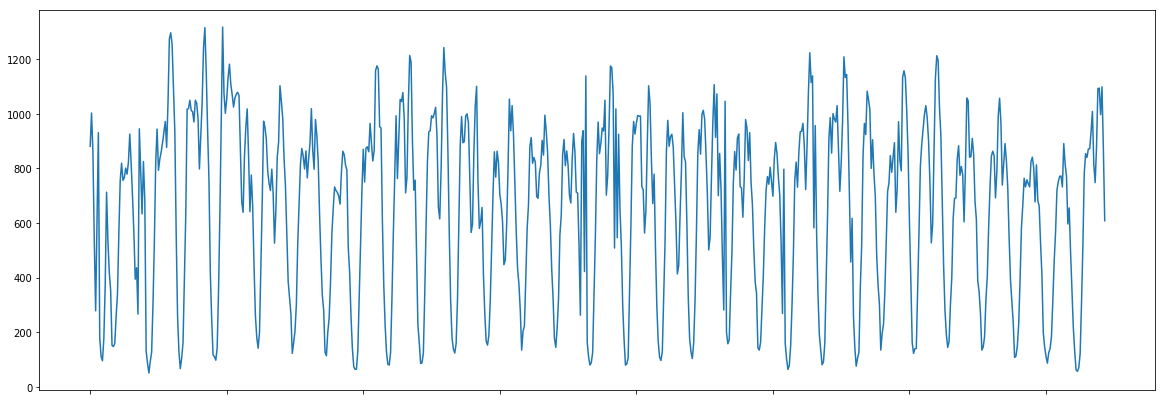

In [158]:
plt.figure(figsize=(20,7))
agg_data.loc[:,1231].plot.line()

# 6 item

In [154]:
counter

1718238

Моя первая реализация построения почасовых данных о заказах заняла бы по моим подсчетам около 5 дней:) Потом я подглядел в чужой работе, что состыковать stats.binned_statistic_2d и номера регионов можно в самой функции, хотя мне кажется этот момент слегка рандомным. Но это спасло. В любом случае, я так понимаю, что в этом проекте временные затраты на калькуляцию будут одной из главных проблем. Подскажите например, как можно ускорить подсчет нулевых ячеек в последнем пункте задания